In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [2]:
# Determine the data path.
Data_path = "C:\\Users\\Beena Tiwari\\Downloads\\MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_December_2023.csv" 
# Load the dataset
data = pd.read_csv(Data_path)
data

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584
261,2023,OCT,23775,45473,1122680147,740582533
262,2023,NOV,22720,42260,1062465105,694190564


In [3]:
data.dropna(inplace=True)  #Dropping rows with missing values

In [4]:
# Remove any spaces at the end of the column names.
cleaned_columns = [col.strip() for col in data.columns]
data.columns = cleaned_columns

# Check the cleaned column names
print("Cleaned columns:", data.columns)

Cleaned columns: Index(['Year', 'Month', 'New', 'Used', 'Total Sales New', 'Total Sales Used'], dtype='object')


In [5]:
# Merge "Month" and "Year" into a single datetime column called "Date."
data['Date'] = pd.to_datetime(data['Year'].astype(str) + data['Month'], format='%Y%b')
data

,Year,Month,New,Used,Total Sales New,Total Sales Used,Date
0,2002,JAN,31106,49927,755015820,386481929,2002-01-01
1,2002,FEB,27520,50982,664454223,361353242,2002-02-01
2,2002,MAR,34225,58794,805666244,419385387,2002-03-01
3,2002,APR,36452,59817,846368297,433061150,2002-04-01
4,2002,MAY,37359,60577,855005784,442569410,2002-05-01
...,...,...,...,...,...,...,...
259,2023,AUG,25876,52725,1222581892,908454060,2023-08-01
260,2023,SEP,23892,45386,1134437699,744676584,2023-09-01
261,2023,OCT,23775,45473,1122680147,740582533,2023-10-01
262,2023,NOV,22720,42260,1062465105,694190564,2023-11-01


In [6]:
# Check for missing values
missing_data = {}
for col in data.columns:
    missing_data[col] = data[col].isnull().sum()

print(missing_data)

{'Year': 0, 'Month': 0, 'New': 0, 'Used': 0, 'Total Sales New': 0, 'Total Sales Used': 0, 'Date': 0}


In [7]:
# Remove the initial "Month" and "Year" columns.
data.drop(['Year', 'Month'], axis=1, errors='ignore', inplace=True)

# Display the first few rows to confirm changes
print(data.head())

     New   Used  Total Sales New  Total Sales Used       Date
0  31106  49927        755015820         386481929 2002-01-01
1  27520  50982        664454223         361353242 2002-02-01
2  34225  58794        805666244         419385387 2002-03-01
3  36452  59817        846368297         433061150 2002-04-01
4  37359  60577        855005784         442569410 2002-05-01


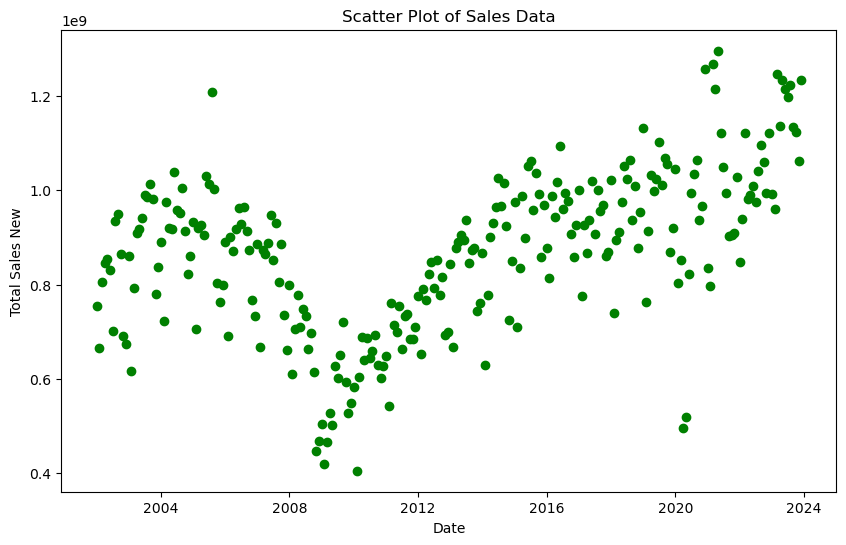

In [8]:
# Visualize the Time-Series Data

plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Total Sales New'], marker='o', color='green')
plt.title('Scatter Plot of Sales Data')
plt.xlabel('Date')
plt.ylabel('Total Sales New')
plt.show()

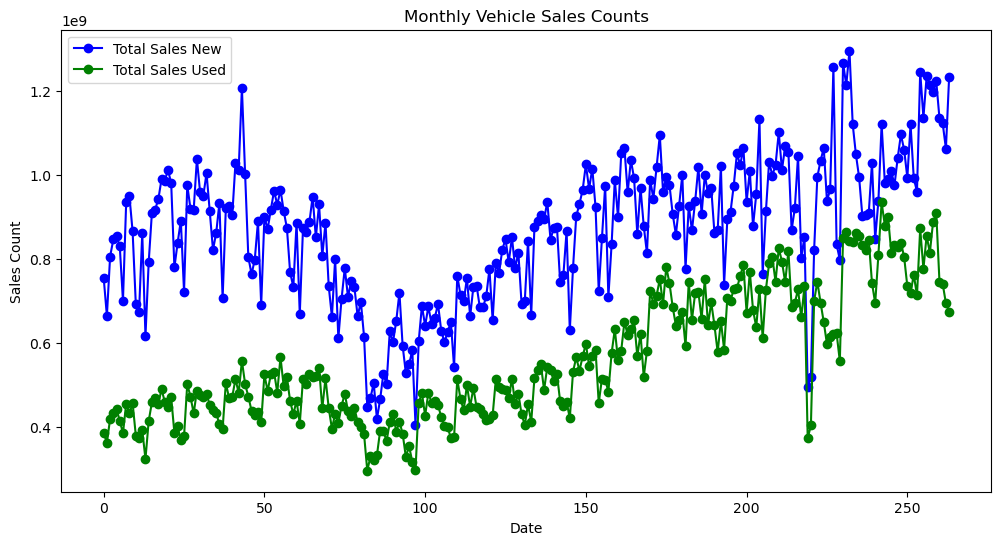

In [9]:
# Visualize the time-series data with custom color and plot style
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Sales New'], linestyle='-', marker='o', color='blue', label='Total Sales New')
plt.plot(data.index, data['Total Sales Used'], linestyle='-', marker='o', color='green', label='Total Sales Used')
plt.title('Monthly Vehicle Sales Counts')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

In [10]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your dataset
# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)  # You may adjust the test_size and shuffle as needed

# Define a function to fit SARIMA model, make predictions, and evaluate performance
def fit_sarima_and_evaluate(train, test, column):
    # Fit SARIMA model
    model = SARIMAX(train[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit()

    # Make future predictions
    forecast = fit_model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

    # Evaluate the performance of the forecasting model
    mae = mean_absolute_error(test[column], forecast)
    mse = mean_squared_error(test[column], forecast)
    
    return mae, mse

# Fit SARIMA model and evaluate for 'Total Sales New'
mae_new_sarima, mse_new_sarima = fit_sarima_and_evaluate(train, test, 'Total Sales New')

# Fit SARIMA model and evaluate for 'Total Sales Used'
mae_used_sarima, mse_used_sarima = fit_sarima_and_evaluate(train, test, 'Total Sales Used')

# Print evaluation metrics for SARIMA models
print("SARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_new_sarima)
print("   - Mean Squared Error (SARIMA):", mse_new_sarima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_used_sarima)
print("   - Mean Squared Error (SARIMA):", mse_used_sarima)


SARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (SARIMA): 139080888.2573192
   - Mean Squared Error (SARIMA): 3.3456278157024956e+16
 - Used Sales Count:
   - Mean Absolute Error (SARIMA): 115671033.08196023
   - Mean Squared Error (SARIMA): 2.24821414093096e+16


In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your dataset
# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)  # You may adjust the test_size and shuffle as needed

# Define a function to fit ARIMA model, make predictions, and evaluate performance
def fit_arima_and_evaluate(train, test, column):
    # Fit ARIMA model
    model = ARIMA(train[column], order=(1, 1, 1))
    fit_model = model.fit()

    # Make future predictions
    forecast = fit_model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

    # Evaluate the performance of the forecasting model
    mae = mean_absolute_error(test[column], forecast)
    mse = mean_squared_error(test[column], forecast)
    
    return mae, mse

# Fit ARIMA model and evaluate for 'Total Sales New'
mae_new_arima, mse_new_arima = fit_arima_and_evaluate(train, test, 'Total Sales New')

# Fit ARIMA model and evaluate for 'Total Sales Used'
mae_used_arima, mse_used_arima = fit_arima_and_evaluate(train, test, 'Total Sales Used')

# Print evaluation metrics for ARIMA models
print("ARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_new_arima)
print("   - Mean Squared Error (ARIMA):", mse_new_arima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_used_arima)
print("   - Mean Squared Error (ARIMA):", mse_used_arima)


ARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (ARIMA): 127582997.48824152
   - Mean Squared Error (ARIMA): 2.9134358875768996e+16
 - Used Sales Count:
   - Mean Absolute Error (ARIMA): 90717271.1036761
   - Mean Squared Error (ARIMA): 1.5321793173685612e+16


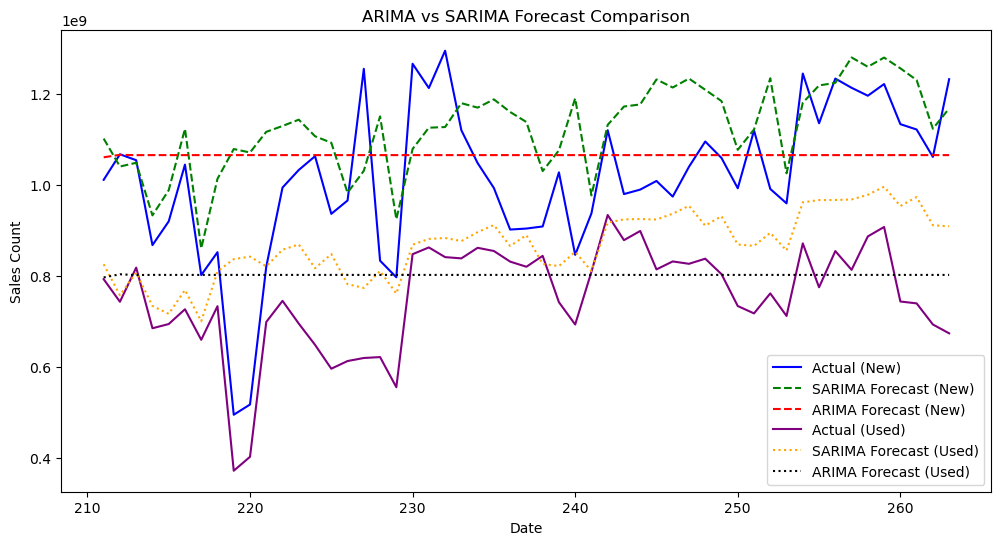

In [12]:
# Comparing Both the Models 
# Fit SARIMA model for 'Total Sales New'
model_sarima_new = SARIMAX(train['Total Sales New'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model_sarima_new = model_sarima_new.fit()

# Make future predictions for 'Total Sales New'
forecast_sarima_new = fit_model_sarima_new.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the performance of SARIMA for 'Total Sales New'
mae_new_sarima = mean_absolute_error(test['Total Sales New'], forecast_sarima_new)
mse_new_sarima = mean_squared_error(test['Total Sales New'], forecast_sarima_new)

# Fit ARIMA model for 'Total Sales New'
model_arima_new = ARIMA(train['Total Sales New'], order=(1, 1, 1))
fit_model_arima_new = model_arima_new.fit()

# Make future predictions for 'Total Sales New'
forecast_arima_new = fit_model_arima_new.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the performance of ARIMA for 'Total Sales New'
mae_new_arima = mean_absolute_error(test['Total Sales New'], forecast_arima_new)
mse_new_arima = mean_squared_error(test['Total Sales New'], forecast_arima_new)

# Fit SARIMA model for 'Total Sales Used'
model_sarima_used = SARIMAX(train['Total Sales Used'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model_sarima_used = model_sarima_used.fit()

# Make future predictions for 'Total Sales Used'
forecast_sarima_used = fit_model_sarima_used.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the performance of SARIMA for 'Total Sales Used'
mae_used_sarima = mean_absolute_error(test['Total Sales Used'], forecast_sarima_used)
mse_used_sarima = mean_squared_error(test['Total Sales Used'], forecast_sarima_used)

# Fit ARIMA model for 'Total Sales Used'
model_arima_used = ARIMA(train['Total Sales Used'], order=(1, 1, 1))
fit_model_arima_used = model_arima_used.fit()

# Make future predictions for 'Total Sales Used'
forecast_arima_used = fit_model_arima_used.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the performance of ARIMA for 'Total Sales Used'
mae_used_arima = mean_absolute_error(test['Total Sales Used'], forecast_arima_used)
mse_used_arima = mean_squared_error(test['Total Sales Used'], forecast_arima_used)

# Plotting
plt.figure(figsize=(12, 6))

# Plot SARIMA vs ARIMA for 'Total Sales New'
plt.plot(test.index, test['Total Sales New'], label='Actual (New)', color='blue')
plt.plot(test.index, forecast_sarima_new, label='SARIMA Forecast (New)', linestyle='--', color='green')
plt.plot(test.index, forecast_arima_new, label='ARIMA Forecast (New)', linestyle='--', color='red')

# Plot SARIMA vs ARIMA for 'Total Sales Used'
plt.plot(test.index, test['Total Sales Used'], label='Actual (Used)', color='purple')
plt.plot(test.index, forecast_sarima_used, label='SARIMA Forecast (Used)', linestyle=':', color='orange')
plt.plot(test.index, forecast_arima_used, label='ARIMA Forecast (Used)', linestyle=':', color='black')

plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

In [13]:
# Print evaluation metrics
print("\nARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_new_arima)
print("   - Mean Squared Error (ARIMA):", mse_new_arima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_used_arima)
print("   - Mean Squared Error (ARIMA):", mse_used_arima)

print("\nSARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_new_sarima)
print("   - Mean Squared Error (SARIMA):", mse_new_sarima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_used_sarima)
print("   - Mean Squared Error (SARIMA):", mse_used_sarima)


ARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (ARIMA): 127582997.48824152
   - Mean Squared Error (ARIMA): 2.9134358875768996e+16
 - Used Sales Count:
   - Mean Absolute Error (ARIMA): 90717271.1036761
   - Mean Squared Error (ARIMA): 1.5321793173685612e+16

SARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (SARIMA): 139080888.2573192
   - Mean Squared Error (SARIMA): 3.3456278157024956e+16
 - Used Sales Count:
   - Mean Absolute Error (SARIMA): 115671033.08196023
   - Mean Squared Error (SARIMA): 2.24821414093096e+16
